C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="viewCount", y="title", data=top_10_views, palette="viridis")
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:23: UserWarning: Glyph 128560 (\N{FACE WITH OPEN MOUTH AND COLD SWEAT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:23: UserWarning: Glyph 128196 (\N{PAGE FACING UP}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:23: UserWarning: Glyph 128296 (\N{HAMMER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:23: UserWarning: Glyph 129320 (\N{FACE WITH ONE EYEBROW RAISED}) missing from font(s) Arial.
  plt.tig

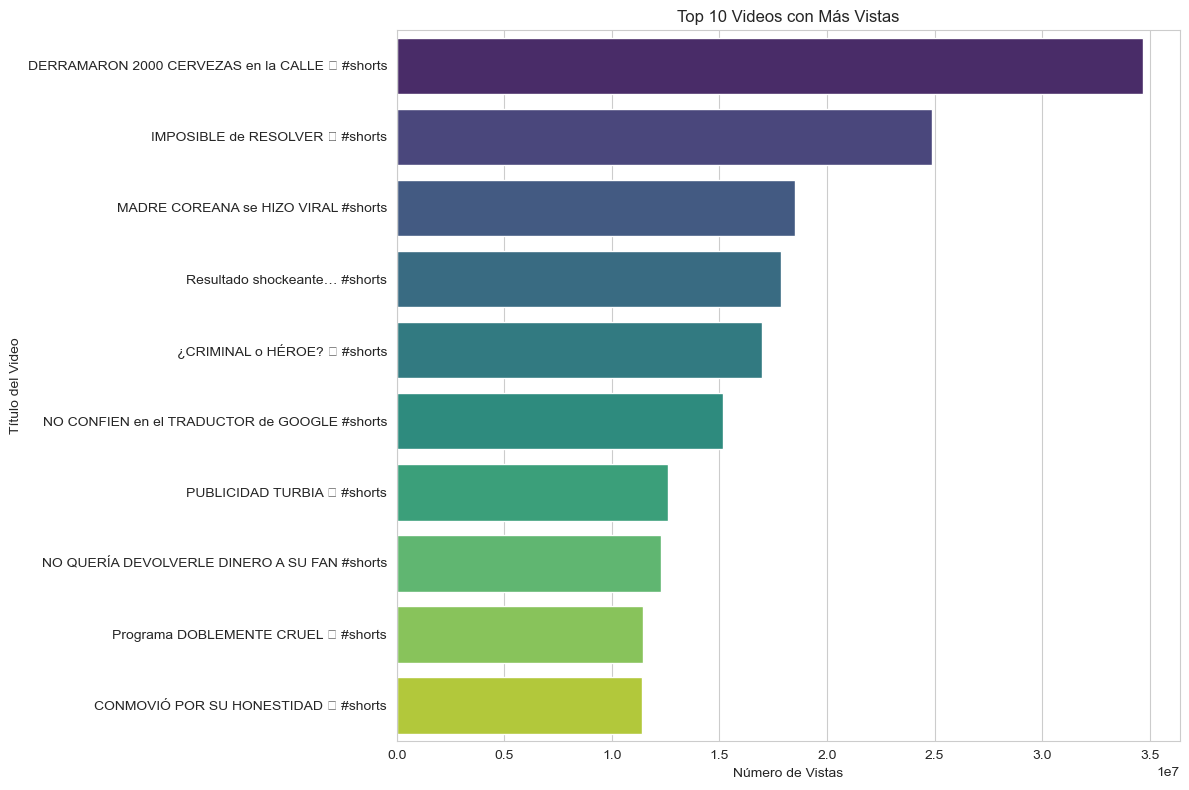

C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="engagement_rate", y="title", data=top_10_engagement, palette="plasma")
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:34: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:34: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:34: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:34: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) Arial.
  plt.tight_layout()

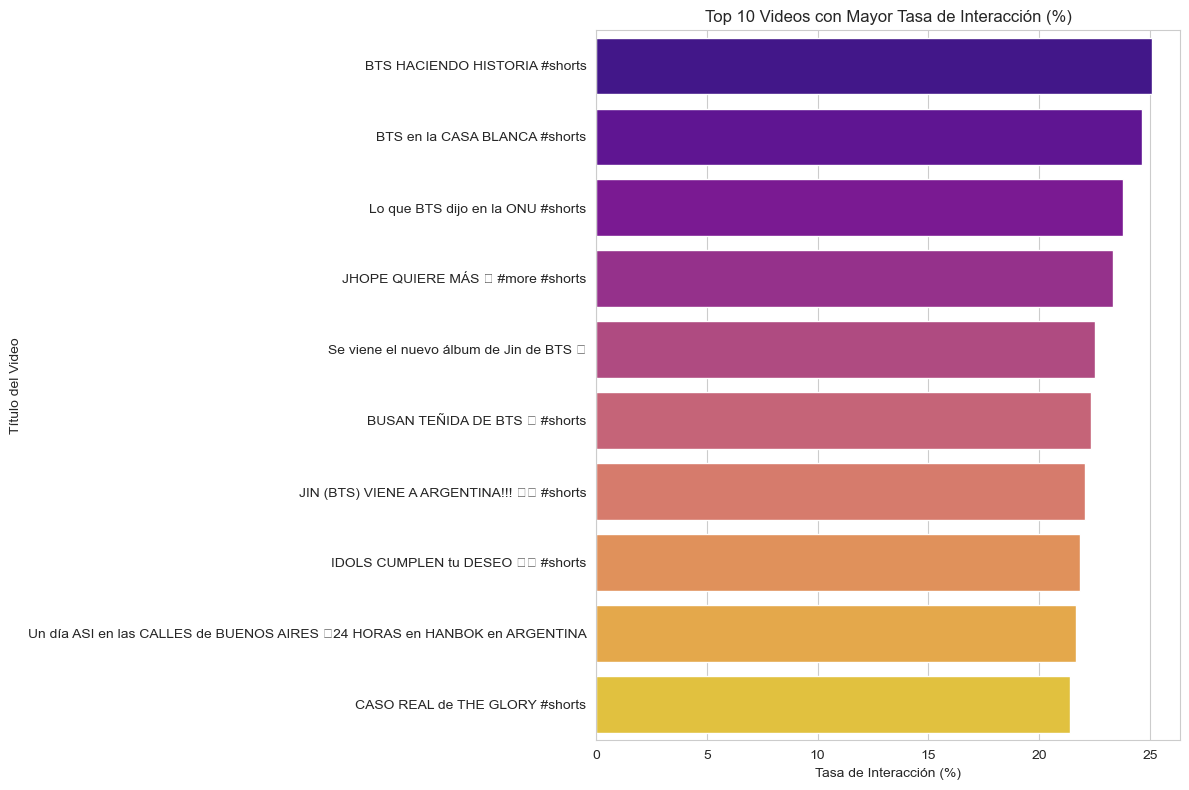

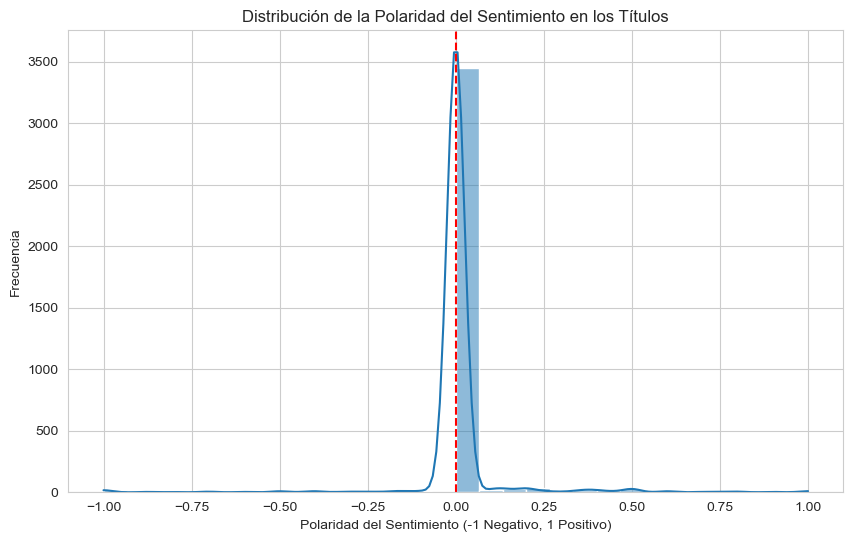

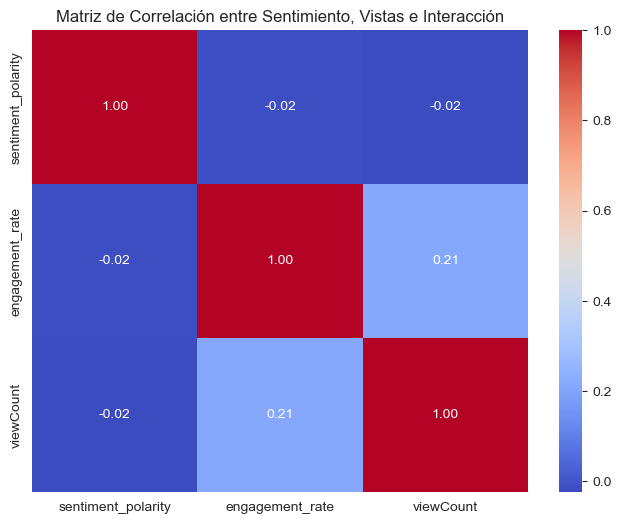

C:\Users\itzel\AppData\Local\Temp\ipykernel_14012\3458628969.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_views = df_time['viewCount'].resample('M').sum()


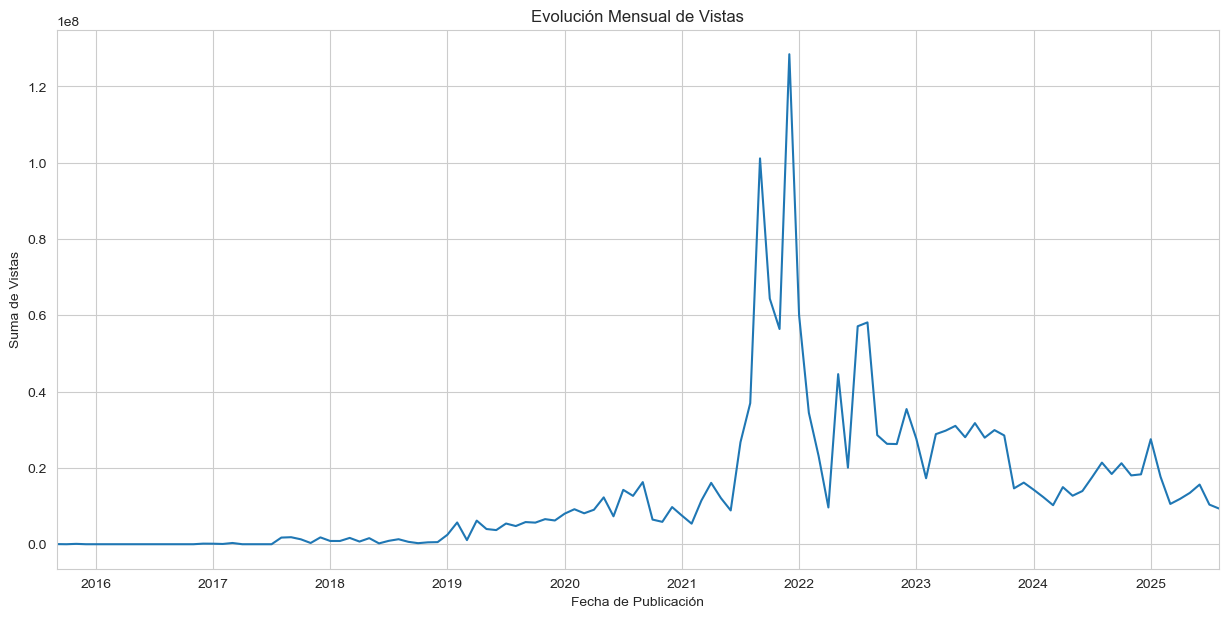

In [21]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualizaciones
sns.set_style("whitegrid")

# Cargar los datos procesados
df = pd.read_csv("../data/videos_final_con_sentimiento.csv")
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# --- Análisis Exploratorio (EDA) ---

# 1. Videos con más vistas
top_10_views = df.sort_values(by="viewCount", ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x="viewCount", y="title", data=top_10_views, palette="viridis")
plt.title("Top 10 Videos con Más Vistas")
plt.xlabel("Número de Vistas")
plt.ylabel("Título del Video")
plt.tight_layout()
plt.show()

# 2. Videos con mayor tasa de interacción
top_10_engagement = df.sort_values(by="engagement_rate", ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x="engagement_rate", y="title", data=top_10_engagement, palette="plasma")
plt.title("Top 10 Videos con Mayor Tasa de Interacción (%)")
plt.xlabel("Tasa de Interacción (%)")
plt.ylabel("Título del Video")
plt.tight_layout()
plt.show()

# --- Análisis de Sentimiento ---

# 3. Distribución del sentimiento de los títulos
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=30, kde=True)
plt.title("Distribución de la Polaridad del Sentimiento en los Títulos")
plt.xlabel("Polaridad del Sentimiento (-1 Negativo, 1 Positivo)")
plt.ylabel("Frecuencia")
plt.axvline(0, color='red', linestyle='--')
plt.show()

# 4. Correlación entre sentimiento e interacción
correlation = df[['sentiment_polarity', 'engagement_rate', 'viewCount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Sentimiento, Vistas e Interacción")
plt.show()
# Comentario: Una correlación cercana a 0 indica que no hay una relación lineal fuerte.
# Esto es un hallazgo en sí mismo.

# 5. Evolución de vistas a lo largo del tiempo
df_time = df.set_index('publishedAt')
monthly_views = df_time['viewCount'].resample('M').sum()

plt.figure(figsize=(15, 7))
monthly_views.plot()
plt.title("Evolución Mensual de Vistas")
plt.xlabel("Fecha de Publicación")
plt.ylabel("Suma de Vistas")
plt.show()

